In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
print("Libraries loaded successfully")

Libraries loaded successfully


In [2]:
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/Train'
valid_path = 'Datasets/Test'

In [3]:
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [4]:
for layer in resnet.layers:
    layer.trainable = False

In [5]:
folders = glob('Datasets/Train/*')
folders

['Datasets/Train\\Ford Mustang',
 'Datasets/Train\\Hummer',
 'Datasets/Train\\McLaren',
 'Datasets/Train\\Mercedes Benz',
 'Datasets/Train\\Others']

In [6]:
x = Flatten()(resnet.output)

In [7]:
prediction = Dense(len(folders), activation='softmax')(x)

model = Model(inputs=resnet.input, outputs=prediction)

In [8]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [9]:
model.compile(
  loss='categorical_crossentropy',
  optimizer= 'adam',
  metrics=['accuracy']
)

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [11]:
training_set = train_datagen.flow_from_directory('Datasets/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 506 images belonging to 5 classes.


In [12]:
training_set.class_indices

{'Ford Mustang': 0, 'Hummer': 1, 'McLaren': 2, 'Mercedes Benz': 3, 'Others': 4}

In [13]:
test_set = test_datagen.flow_from_directory('Datasets/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 46 images belonging to 5 classes.


In [14]:
test_set.class_indices

{'Ford Mustang': 0,
 'Hummer': 1,
 'McLaren': 2,
 'Mercerdes Benz': 3,
 'Others': 4}

In [15]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=100,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\anand\AppData\Local\Temp\ipykernel_10308\985405674.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/100
32/32 [==============================] - 34s 994ms/step - loss: 5.2780 - accuracy: 0.2609 - val_loss: 3.8472 - val_accuracy: 0.3478
Epoch 2/100
32/32 [==============================] - 30s 931ms/step - loss: 2.1057 - accuracy: 0.4012 - val_loss: 2.2763 - val_accuracy: 0.3913
Epoch 3/100
32/32 [==============================] - 30s 921ms/step - loss: 1.5837 - accuracy: 0.4486 - val_loss: 1.7278 - val_accuracy: 0.3043
Epoch 4/100
32/32 [==============================] - 29s 906ms/step - loss: 1.9570 - accuracy: 0.4783 - val_loss: 2.1829 - val_accuracy: 0.3913
Epoch 5/100
32/32 [==============================] - 29s 895ms/step - loss: 1.6340 - accuracy: 0.5336 - val_loss: 1.5562 - val_accuracy: 0.4130
Epoch 6/100
32/32 [==============================] - 30s 947ms/step - loss: 1.3439 - accuracy: 0.5652 - val_loss: 2.1844 - val_accuracy: 0.4565
Epoch 7/100
32/32 [==============================] - 35s 1s/step - loss: 2.0251 - accuracy: 0.4644 - val_loss: 1.7032 - val_accuracy: 0.

Epoch 58/100
32/32 [==============================] - 28s 859ms/step - loss: 0.4489 - accuracy: 0.8241 - val_loss: 4.0429 - val_accuracy: 0.4565
Epoch 59/100
32/32 [==============================] - 28s 861ms/step - loss: 0.9780 - accuracy: 0.7510 - val_loss: 2.5574 - val_accuracy: 0.5217
Epoch 60/100
32/32 [==============================] - 28s 866ms/step - loss: 0.8035 - accuracy: 0.7530 - val_loss: 2.7130 - val_accuracy: 0.4348
Epoch 61/100
32/32 [==============================] - 28s 860ms/step - loss: 1.5239 - accuracy: 0.6897 - val_loss: 3.1695 - val_accuracy: 0.4565
Epoch 62/100
32/32 [==============================] - 28s 876ms/step - loss: 1.3008 - accuracy: 0.6581 - val_loss: 4.7145 - val_accuracy: 0.4783
Epoch 63/100
32/32 [==============================] - 30s 937ms/step - loss: 1.5250 - accuracy: 0.6601 - val_loss: 3.3293 - val_accuracy: 0.4783
Epoch 64/100
32/32 [==============================] - 29s 924ms/step - loss: 0.7099 - accuracy: 0.7727 - val_loss: 3.0289 - val_ac

In [16]:
from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [19]:
load_model("model_resnet50.h5")

In [20]:
# Loading the test data from the local machine

dir_path = 'Datasets\Test-Sets'

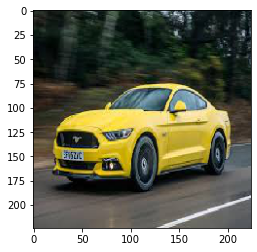

This is a Mercedes Benz


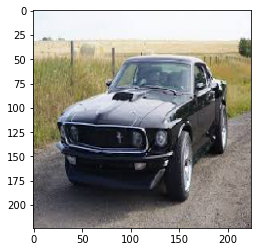

This is a Hummer


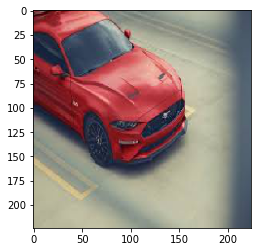

This is a Mclaren


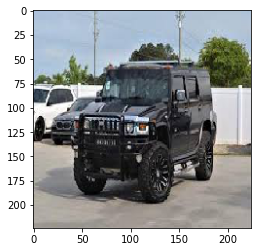

This is a Hummer


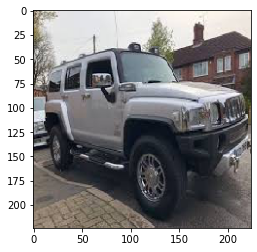

This is a Hummer


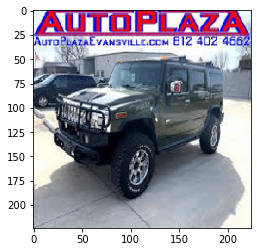

This is a Hummer


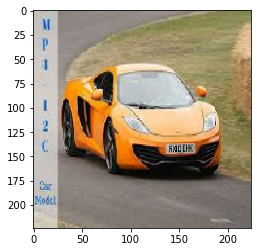

This is a Mercedes Benz


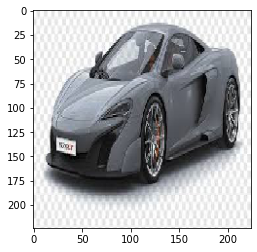

This is a Mercedes Benz


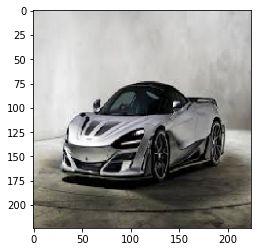

This is a Mercedes Benz


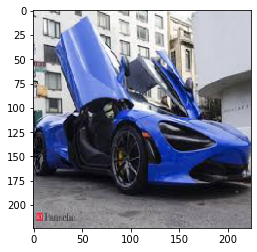

This is a Mercedes Benz


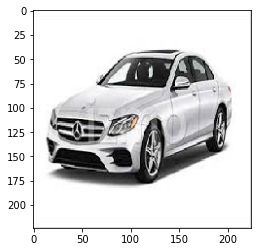

This is a Mercedes Benz


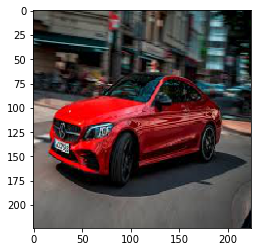

This is a Mercedes Benz


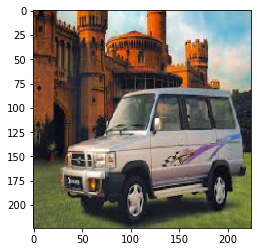

This is a Mercedes Benz


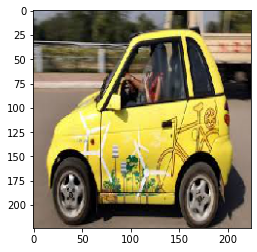

This is a Mercedes Benz


In [23]:
# Listing all the files in the directory

import os

for i in os.listdir(dir_path):
    test_images = len(os.listdir(dir_path))
    img = image.load_img(dir_path + '\\' + i, target_size=(224, 224))
    plt.imshow(img)
    plt.show()
    
# Converting the image to a numpy array   

    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    
# Loading the model  

    classes = model.predict(images)
    classes = np.argmax(classes, axis=1)
    
# Printing the results   

    if classes == 0:
        print("This is a Ford Mustang")
    elif classes == 1:
        print("This is a Hummer")
    elif classes == 2:
        print("This is a Mclaren")
    elif classes == 3:
        print("This is a Mercedes Benz")
    else:
        print("This is an other model car")